In [2]:
import pandas as pd
import numpy as np

In [3]:
path="tv_shows.csv"

In [4]:
df=pd.read_csv(path)

In [5]:
df.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [6]:
df.drop(['type','Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.head()


,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0
2,Money Heist,2017,18+,8.4,91%,1,0,0,0
3,Sherlock,2010,16+,9.1,78%,1,0,0,0
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0


In [8]:
df.value_counts()

Title            Year  Age  IMDb  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+
mixed-ish        2019  7+   6.2   80%              0        1     0            0          1
Grimm            2011  16+  7.8   89%              0        0     1            0          1
Hart of Dixie    2011  7+   7.7   81%              1        0     0            0          1
Harper's Island  2009  16+  7.5   64%              0        0     1            0          1
Harlots          2017  18+  7.7   98%              0        1     0            0          1
                                                                                         ..
Sealab 2021      2000  16+  7.9   74%              0        1     0            0          1
Scrubs           2001  7+   8.3   83%              0        1     0            0          1
Scream Queens    2015  16+  7.1   75%              0        1     0            0          1
Schooled         2019  7+   6.9   73%              0        1     0            0     

In [9]:
df.dtypes

Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
dtype: object

In [10]:
df['Age']=df['Age'].str.rstrip('+ \n\t')

In [11]:
df['Rotten Tomatoes']=df['Rotten Tomatoes'].str.rstrip('%')

In [12]:
df['Age'].value_counts()

16     1018
7       848
18      750
all     545
13        4
Name: Age, dtype: int64

In [13]:
df['Age'] = df['Age'].str.replace('all','0')

In [14]:
df['Age'].replace(np.nan,'0',inplace=True)

In [15]:
df['Age'].value_counts()

0     2991
16    1018
7      848
18     750
13       4
Name: Age, dtype: int64

In [16]:
df['Age'].isnull().sum()

0

In [17]:
df['IMDb'].isnull().sum()

1161

In [18]:
df.dropna(subset=['IMDb'],inplace=True)

In [19]:
df.shape

(4450, 9)

In [20]:
df['IMDb'].isnull().sum()

0

In [21]:
df['Rotten Tomatoes'].isnull().sum()

3442

In [22]:
df['Age']=df['Age'].astype(str).astype(int)

In [23]:
df.dtypes

Title               object
Year                 int64
Age                  int32
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
dtype: object

In [24]:
df['IMDb'].max()

9.6

In [25]:
Q1 = np.percentile(df['IMDb'], 25, interpolation = 'midpoint')

Q3 = np.percentile(df['IMDb'], 75, interpolation = 'midpoint')
Q1,Q3
IQR=Q3-Q1
IQR

1.3000000000000007

In [26]:
bins=np.linspace(IQR,max(df["IMDb"]),6)
bins

array([1.3 , 2.96, 4.62, 6.28, 7.94, 9.6 ])

In [27]:
group_names=['verylow','low','medium','high','veryhigh']

In [28]:
df['IMDb_Cat']=pd.cut(df['IMDb'],bins,labels=group_names,include_lowest=True)

In [29]:
df['IMDb_Cat'].value_counts()

high        2590
veryhigh    1050
medium       638
low          149
verylow       22
Name: IMDb_Cat, dtype: int64

In [30]:
df['IMDb_Cat'].shape

(4450,)

In [31]:
df.describe()

,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+
count,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000
mean,2010.619101,8.001798,7.113258,0.406966,0.340899,0.293708,0.037978
std,11.001393,7.627157,1.132060,0.491324,0.474065,0.455511,0.191163
min,1934.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,0.000000,6.600000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,7.000000,7.300000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,16.000000,7.900000,1.000000,1.000000,1.000000,0.000000
max,2020.000000,18.000000,9.600000,1.000000,1.000000,1.000000,1.000000


In [32]:

df['Rotten Tomatoes'] = df['Rotten Tomatoes'].fillna(df['IMDb_Cat'].map({'verylow':'20', 'low':'40','medium':'60','high':'80','veryhigh':'100'}))

In [33]:
df['Rotten Tomatoes'].value_counts()

80     2064
100     799
60      573
40      144
93       36
       ... 
46        1
18        1
55        1
26        1
32        1
Name: Rotten Tomatoes, Length: 88, dtype: int64

In [34]:
df.dropna(subset=['Rotten Tomatoes'], inplace=True)

In [35]:
df.shape

(4449, 10)

In [36]:
df['Rotten Tomatoes'].isnull().sum()

0

In [37]:
df.drop(['IMDb_Cat'],axis=1,inplace=True)

In [38]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,18,9.5,96,1,0,0,0
1,Stranger Things,2016,16,8.8,93,1,0,0,0
2,Money Heist,2017,18,8.4,91,1,0,0,0
3,Sherlock,2010,16,9.1,78,1,0,0,0
4,Better Call Saul,2015,18,8.7,97,1,0,0,0


In [39]:
df['Rotten Tomatoes']=df['Rotten Tomatoes'].astype(str).astype(int)

In [40]:
df.dtypes

Title               object
Year                 int64
Age                  int32
IMDb               float64
Rotten Tomatoes      int32
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
dtype: object

In [41]:
df.corr()

,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
Year,1.000000,0.151316,-0.077118,-0.067651,0.276008,-0.119591,-0.252712,-0.021746
Age,0.151316,1.000000,0.158399,0.041491,0.025348,0.178228,-0.149389,-0.129913
IMDb,-0.077118,0.158399,1.000000,0.776358,0.038205,-0.034121,0.037250,-0.033630
Rotten Tomatoes,-0.067651,0.041491,0.776358,1.000000,0.035041,-0.031379,0.025004,-0.008726
Netflix,0.276008,0.025348,0.038205,0.035041,1.000000,-0.481807,-0.451768,-0.150205
Hulu,-0.119591,0.178228,-0.034121,-0.031379,-0.481807,1.000000,-0.295282,-0.098286
Prime Video,-0.252712,-0.149389,0.037250,0.025004,-0.451768,-0.295282,1.000000,-0.128161
Disney+,-0.021746,-0.129913,-0.033630,-0.008726,-0.150205,-0.098286,-0.128161,1.000000


In [42]:
df['Netflix'].value_counts()

0    2639
1    1810
Name: Netflix, dtype: int64

In [43]:
df['Hulu'].value_counts()

0    2932
1    1517
Name: Hulu, dtype: int64

In [44]:
df['Prime Video'].value_counts()

0    3142
1    1307
Name: Prime Video, dtype: int64

In [45]:
df['Disney+'].value_counts()

0    4280
1     169
Name: Disney+, dtype: int64

In [46]:
df1=df[['Netflix','Hulu','Prime Video','Disney+']].groupby(df['Year']).sum()

In [47]:
df1.tail(20)

,Netflix,Hulu,Prime Video,Disney+
Year,,,,
2001,6,18,21,3
2002,10,18,17,1
2003,11,17,17,2
2004,9,28,33,2
2005,15,42,42,2
2006,19,47,33,6
2007,25,38,34,3
2008,27,41,53,4
2009,43,61,52,4


<AxesSubplot:xlabel='Year'>

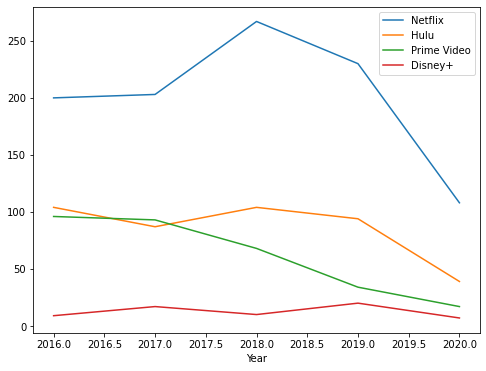

In [48]:
df1.tail(5).plot(kind='line',figsize=(8,6))

In [49]:
df1['Total']=df1.sum(axis=1)

In [50]:
df1

,Netflix,Hulu,Prime Video,Disney+,Total
Year,,,,,
1934,0,1,0,0,1
1947,0,2,0,0,2
1948,0,0,1,0,1
1949,0,0,1,0,1
1950,0,1,0,0,1
...,...,...,...,...,...
2016,200,104,96,9,409
2017,203,87,93,17,400
2018,267,104,68,10,449


In [51]:
df1=df1.reset_index()


In [52]:
df1

,Year,Netflix,Hulu,Prime Video,Disney+,Total
0,1934,0,1,0,0,1
1,1947,0,2,0,0,2
2,1948,0,0,1,0,1
3,1949,0,0,1,0,1
4,1950,0,1,0,0,1
...,...,...,...,...,...,...
69,2016,200,104,96,9,409
70,2017,203,87,93,17,400
71,2018,267,104,68,10,449
72,2019,230,94,34,20,378


<AxesSubplot:xlabel='Year'>

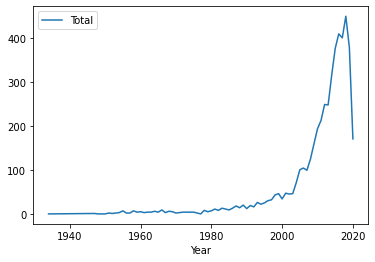

In [53]:
df1.plot(kind='line',x='Year',y='Total')

In [54]:
df2=df[['Netflix','Hulu','Prime Video','Disney+']].groupby(df['Year']).sum()
df2=df2.transpose()
df2

Year,1934,1947,1948,1949,1950,1951,1952,1954,1955,1956,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Netflix,0,0,0,0,0,0,0,0,0,0,...,73,75,79,124,168,200,203,267,230,108
Hulu,1,2,0,0,1,1,0,2,2,0,...,76,88,100,107,112,104,87,104,94,39
Prime Video,0,0,1,1,0,2,2,2,5,3,...,58,75,63,76,87,96,93,68,34,17
Disney+,0,0,0,0,0,0,0,0,1,0,...,6,11,6,8,9,9,17,10,20,7


In [55]:
df2['Total']=df2.sum(axis=1)
df2

Year,1934,1947,1948,1949,1950,1951,1952,1954,1955,1956,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
Netflix,0,0,0,0,0,0,0,0,0,0,...,75,79,124,168,200,203,267,230,108,1810
Hulu,1,2,0,0,1,1,0,2,2,0,...,88,100,107,112,104,87,104,94,39,1517
Prime Video,0,0,1,1,0,2,2,2,5,3,...,75,63,76,87,96,93,68,34,17,1307
Disney+,0,0,0,0,0,0,0,0,1,0,...,11,6,8,9,9,17,10,20,7,169


In [56]:
df2=df2.reset_index()

In [57]:
df2

Year,index,1934,1947,1948,1949,1950,1951,1952,1954,1955,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,Netflix,0,0,0,0,0,0,0,0,0,...,75,79,124,168,200,203,267,230,108,1810
1,Hulu,1,2,0,0,1,1,0,2,2,...,88,100,107,112,104,87,104,94,39,1517
2,Prime Video,0,0,1,1,0,2,2,2,5,...,75,63,76,87,96,93,68,34,17,1307
3,Disney+,0,0,0,0,0,0,0,0,1,...,11,6,8,9,9,17,10,20,7,169


In [58]:
df2.rename(columns = {'index':'platform'}, inplace = True)

In [59]:
df2=df2.sort_values(['Total'], ascending=False)
df2

Year,platform,1934,1947,1948,1949,1950,1951,1952,1954,1955,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,Netflix,0,0,0,0,0,0,0,0,0,...,75,79,124,168,200,203,267,230,108,1810
1,Hulu,1,2,0,0,1,1,0,2,2,...,88,100,107,112,104,87,104,94,39,1517
2,Prime Video,0,0,1,1,0,2,2,2,5,...,75,63,76,87,96,93,68,34,17,1307
3,Disney+,0,0,0,0,0,0,0,0,1,...,11,6,8,9,9,17,10,20,7,169


In [60]:
df2.columns

Index(['platform',       1934,       1947,       1948,       1949,       1950,
             1951,       1952,       1954,       1955,       1956,       1957,
             1958,       1959,       1960,       1961,       1962,       1963,
             1964,       1965,       1966,       1967,       1968,       1969,
             1970,       1971,       1972,       1973,       1974,       1975,
             1976,       1977,       1978,       1979,       1980,       1981,
             1982,       1983,       1984,       1985,       1986,       1987,
             1988,       1989,       1990,       1991,       1992,       1993,
             1994,       1995,       1996,       1997,       1998,       1999,
             2000,       2001,       2002,       2003,       2004,       2005,
             2006,       2007,       2008,       2009,       2010,       2011,
             2012,       2013,       2014,       2015,       2016,       2017,
             2018,       2019,       2020,    'Total

<AxesSubplot:ylabel='platform'>

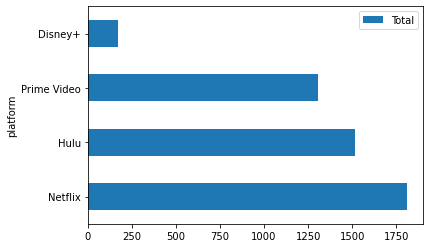

In [61]:
df2.plot(kind='barh',x='platform',y='Total')


In [62]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,18,9.5,96,1,0,0,0
1,Stranger Things,2016,16,8.8,93,1,0,0,0
2,Money Heist,2017,18,8.4,91,1,0,0,0
3,Sherlock,2010,16,9.1,78,1,0,0,0
4,Better Call Saul,2015,18,8.7,97,1,0,0,0


In [63]:
df3=df[(df['Year']>2015) & (df['Age']<18)]

In [64]:
df3

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
1,Stranger Things,2016,16,8.8,93,1,0,0,0
11,Dark,2017,16,8.7,94,1,0,0,0
27,The Good Place,2016,16,8.2,97,1,1,0,0
33,Lucifer,2016,16,8.2,87,1,0,0,0
46,Never Have I Ever,2020,16,8.0,97,1,0,0,0
...,...,...,...,...,...,...,...,...,...
5598,Billy Dilley's Super-Duper Subterranean Summer,2017,7,4.6,40,0,0,0,1
5599,Rocky Mountain Animal Rescue,2018,0,7.8,80,0,0,0,1
5600,Prairie Dog Manor,2019,0,8.6,100,0,0,0,1
5601,Disney Junior Music Nursery Rhymes,2017,0,6.6,80,0,0,0,1


In [65]:
df4=df.groupby(['Age'])
df['Age'].value_counts()

0     1845
16    1013
7      838
18     749
13       4
Name: Age, dtype: int64

In [65]:
df5=df4.get_group(18)

df5
df7=df5.sort_values(['IMDb'], ascending=False)
df7.head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,18,9.5,96,1,0,0,0
3567,Band of Brothers,2001,18,9.4,94,0,0,1,0
3566,The Wire,2002,18,9.3,94,0,0,1,0
1931,Rick and Morty,2013,18,9.2,94,0,1,0,0
3568,The Sopranos,1999,18,9.2,92,0,0,1,0
15,Fullmetal Alchemist: Brotherhood,2009,18,9.1,100,1,1,0,0
97,The Vietnam War,2017,18,9.1,98,1,0,0,0
85,Death Note,2006,18,9.0,100,1,1,0,0
41,When They See Us,2019,18,8.9,96,1,0,0,0
2021,Cowboy Bebop,1998,18,8.9,100,0,1,0,0


In [66]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,18,9.5,96,1,0,0,0
1,Stranger Things,2016,16,8.8,93,1,0,0,0
2,Money Heist,2017,18,8.4,91,1,0,0,0
3,Sherlock,2010,16,9.1,78,1,0,0,0
4,Better Call Saul,2015,18,8.7,97,1,0,0,0


In [67]:
df['sum'] = df.loc[:,['Netflix','Hulu','Prime Video','Disney+']].sum(axis=1)

In [68]:
df

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,sum
0,Breaking Bad,2008,18,9.5,96,1,0,0,0,1
1,Stranger Things,2016,16,8.8,93,1,0,0,0,1
2,Money Heist,2017,18,8.4,91,1,0,0,0,1
3,Sherlock,2010,16,9.1,78,1,0,0,0,1
4,Better Call Saul,2015,18,8.7,97,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5598,Billy Dilley's Super-Duper Subterranean Summer,2017,7,4.6,40,0,0,0,1,1
5599,Rocky Mountain Animal Rescue,2018,0,7.8,80,0,0,0,1,1
5600,Prairie Dog Manor,2019,0,8.6,100,0,0,0,1,1
5601,Disney Junior Music Nursery Rhymes,2017,0,6.6,80,0,0,0,1,1


In [69]:
df['sum'].value_counts()

1    4127
2     290
3      32
Name: sum, dtype: int64

In [70]:
from matplotlib import pyplot as plt
df6=df.sort_values(['sum', 'IMDb'], ascending=[False, False])

df6[['Title','IMDb','Year']].head(10)


,Title,IMDb,Year
460,Forensic Files,8.8,1996
18,Parks and Recreation,8.6,2009
63,Star Trek: The Next Generation,8.6,1987
337,Rake,8.6,2010
123,Mushi-Shi,8.5,2005
279,Rurouni Kenshin,8.5,1996
286,Descendants of the Sun,8.4,2016
71,The Good Wife,8.3,2009
99,Star Trek,8.3,1966
93,American Horror Story,8.0,2011


In [71]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,sum
0,Breaking Bad,2008,18,9.5,96,1,0,0,0,1
1,Stranger Things,2016,16,8.8,93,1,0,0,0,1
2,Money Heist,2017,18,8.4,91,1,0,0,0,1
3,Sherlock,2010,16,9.1,78,1,0,0,0,1
4,Better Call Saul,2015,18,8.7,97,1,0,0,0,1


In [72]:
df_new=df[df['sum']==3]

In [73]:
df_new

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,sum
18,Parks and Recreation,2009,16,8.6,93,1,1,1,0,3
63,Star Trek: The Next Generation,1987,7,8.6,89,1,1,1,0,3
71,The Good Wife,2009,16,8.3,94,1,1,1,0,3
88,Burn Notice,2007,7,7.9,88,1,1,1,0,3
93,American Horror Story,2011,18,8.0,100,1,1,1,0,3
99,Star Trek,1966,7,8.3,80,1,1,1,0,3
123,Mushi-Shi,2005,16,8.5,100,1,1,1,0,3
140,Star Trek: Deep Space Nine,1993,7,7.9,90,1,1,1,0,3
151,Law & Order: Special Victims Unit,1999,16,8.0,100,1,1,1,0,3
179,Star Trek: Voyager,1995,7,7.8,77,1,1,1,0,3


In [300]:
df_new=df_new.sort_values(['IMDb'], ascending=False)
df_new

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,sum
460,Forensic Files,1996,16,8.8,100,1,1,1,0,3
18,Parks and Recreation,2009,16,8.6,93,1,1,1,0,3
337,Rake,2010,16,8.6,100,1,1,1,0,3
63,Star Trek: The Next Generation,1987,7,8.6,89,1,1,1,0,3
279,Rurouni Kenshin,1996,16,8.5,100,1,1,1,0,3
123,Mushi-Shi,2005,16,8.5,100,1,1,1,0,3
286,Descendants of the Sun,2016,16,8.4,100,1,1,1,0,3
71,The Good Wife,2009,16,8.3,94,1,1,1,0,3
99,Star Trek,1966,7,8.3,80,1,1,1,0,3
93,American Horror Story,2011,18,8.0,100,1,1,1,0,3


In [74]:
import matplotlib.pyplot as plt

In [75]:
df_a=df_new[['Title','IMDb']]
df_a=df_a.set_index('Title')

In [76]:
df_a

,IMDb
Title,
Parks and Recreation,8.6
Star Trek: The Next Generation,8.6
The Good Wife,8.3
Burn Notice,7.9
American Horror Story,8.0
Star Trek,8.3
Mushi-Shi,8.5
Star Trek: Deep Space Nine,7.9
Law & Order: Special Victims Unit,8.0


(4.0, 9.24)

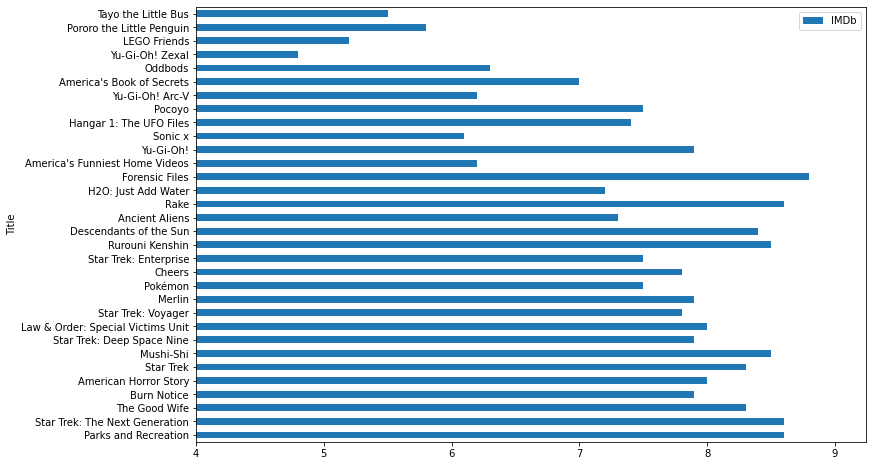

In [84]:
df_a.plot(kind='barh',figsize=(12,8))
plt.xlim(4,)

In [78]:
df

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,sum
0,Breaking Bad,2008,18,9.5,96,1,0,0,0,1
1,Stranger Things,2016,16,8.8,93,1,0,0,0,1
2,Money Heist,2017,18,8.4,91,1,0,0,0,1
3,Sherlock,2010,16,9.1,78,1,0,0,0,1
4,Better Call Saul,2015,18,8.7,97,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5598,Billy Dilley's Super-Duper Subterranean Summer,2017,7,4.6,40,0,0,0,1,1
5599,Rocky Mountain Animal Rescue,2018,0,7.8,80,0,0,0,1,1
5600,Prairie Dog Manor,2019,0,8.6,100,0,0,0,1,1
5601,Disney Junior Music Nursery Rhymes,2017,0,6.6,80,0,0,0,1,1


In [79]:
df_C=df[df['Year']>=2015]
df_C

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,sum
1,Stranger Things,2016,16,8.8,93,1,0,0,0,1
2,Money Heist,2017,18,8.4,91,1,0,0,0,1
4,Better Call Saul,2015,18,8.7,97,1,0,0,0,1
11,Dark,2017,16,8.7,94,1,0,0,0,1
12,Ozark,2017,18,8.4,81,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5598,Billy Dilley's Super-Duper Subterranean Summer,2017,7,4.6,40,0,0,0,1,1
5599,Rocky Mountain Animal Rescue,2018,0,7.8,80,0,0,0,1,1
5600,Prairie Dog Manor,2019,0,8.6,100,0,0,0,1,1
5601,Disney Junior Music Nursery Rhymes,2017,0,6.6,80,0,0,0,1,1


In [80]:
df_B=df_C.set_index(['Year','Age'])
df_d=df_B.groupby(['Year','Age']).sum()
df_d

IMDb  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  sum
Year Age                                                                   
2015 0     948.0            10620       73    27           41        4  145
     7     482.7             5429       28    25           17        5   75
     16    695.8             7470       45    40           16        0  101
     18    413.7             4490       22    20           13        0   55
2016 0    1182.6            13326       85    27           55        8  175
     7     434.7             4590       38    17           10        1   66
     16    830.0             8943       53    44           20        0  117
     18    382.5             4067       24    16           11        0   51
2017 0    1119.1            12680       84    20           55       10  169
     7     386.0             4263       33    13            7        5   58
     16    627.0             6834       40    33           13        2   88
     18    609.8             6475       46    21           18        0   85
2018 0    1137.2            12610       86    39           40        7  172
     7     441.7             5168       46    10            6        3   65
     16    752.6             8103       58    39           10        0  107
     18    724.5             8072       77    16           12        0  105
2019 0     972.2            10909       87    31           13       12  143
     7     428.4             4791       30    19            3        8   60
     16    476.2             5349       35    26            8        0   69
     18    762.5             8322       78    18           10        0  106
2020 0     470.3             5263       49     5           10        3   67
     7      91.3              999        4     6            0        4   14
     16    214.7             2294       10    19            3        0   32
     18    394.7             4189       45     9            4        0   58

<AxesSubplot:ylabel='Year,Age'>

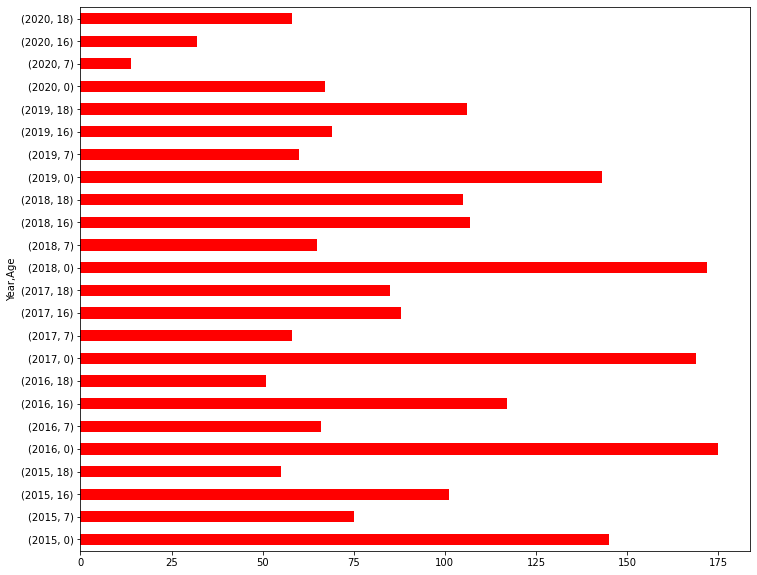

In [81]:
df_d['sum'].plot(kind='barh',figsize=(12,10),color='red')